# MNIST Coding (Deep Learning Section)

Group Members: Craig Bunce, Miguel Chevres-Lopez, Zihao Zhang

Instructor: Maria Wang / EAI 6080 - Adv. Analytical Utilization

## Tensorflow CNN

In [1]:
import math

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

1.14.0


In [2]:
mnist_data = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

In [3]:
x_train.shape, x_test.shape, np.unique(y_train)

((60000, 28, 28),
 (10000, 28, 28),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [4]:
class_names = {i:cn for i, cn in enumerate(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])}

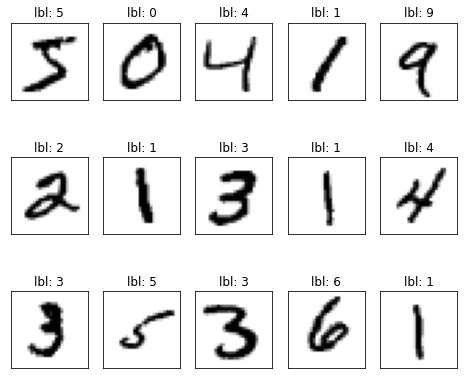

In [5]:
 def plot(images, labels, predictions=None):
    # create a grid with 5 columns
    n_cols = min(5, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols+3, n_rows+4))
    
    if predictions is None:
        predictions = [None] * len(labels)
        
    for i, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[i]
        ax.imshow(x, cmap=plt.cm.binary)
        
        ax.set_title(f"lbl: {class_names[y_true]}")
        
        if y_pred is not None:
            ax.set_xlabel(f"pred: {class_names[y_pred]}")
    
        ax.set_xticks([])
        ax.set_yticks([])

# plot first few images
plot(x_train[:15], y_train[:15]) 

In [6]:
 # scale the values between 0 and 1 for both training and testing set
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
model = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size = 60, epochs = 10, validation_split = 0.2)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
48000/48000 [==============================] - 2s 46us/sample - loss: 0.3588 - acc: 0.9015 - val_loss: 0.1925 - val_acc: 0.9470
Epoch 2/10
48000/48000 [==============================] - 2s 42us/sample - loss: 0.1652 - acc: 0.9531 - val_loss: 0.1541 - val_acc: 0.9553
Epoch 3/10
48000/48000 [==============================] - 2s 42us/sample - loss: 0.1202 - acc: 0.9650 - val_loss: 0.1210 - val_acc: 0.9640
Epoch 4/10
48000/48000 [==============================] - 2s 42us/sample - loss: 0.0929 - acc: 0.9732 - val_loss: 0.1134 - val_acc: 0.9661
Epoch 5/10
48000/48000 [==============================] - 2s 41us/sample - loss: 0.0763 - acc: 0.9779 - val_loss: 0.1071 - val_acc: 0.9678
Epoch 6/10
48000/48000 [===================

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy = {accuracy*100:.2f} %")

10000/10000 [==============================] - 0s 32us/sample - loss: 0.0840 - acc: 0.9755
Accuracy = 97.55 %


In [9]:
probs = model.predict(x_test)
print(probs.argmax(axis=1))

#another way to do the same thing
print(model.predict(x_test).argsort()[:,-1])

# another way to do the same thing
print(model.predict_classes(x_test))

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


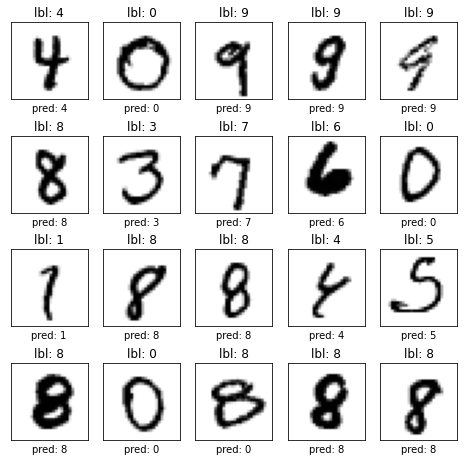

In [10]:
preds = model.predict_classes(x_test)

# plot 20 random data
rand_idxs = np.random.permutation(len(x_test))[:20]

plot(x_test[rand_idxs], y_test[rand_idxs], preds[rand_idxs])

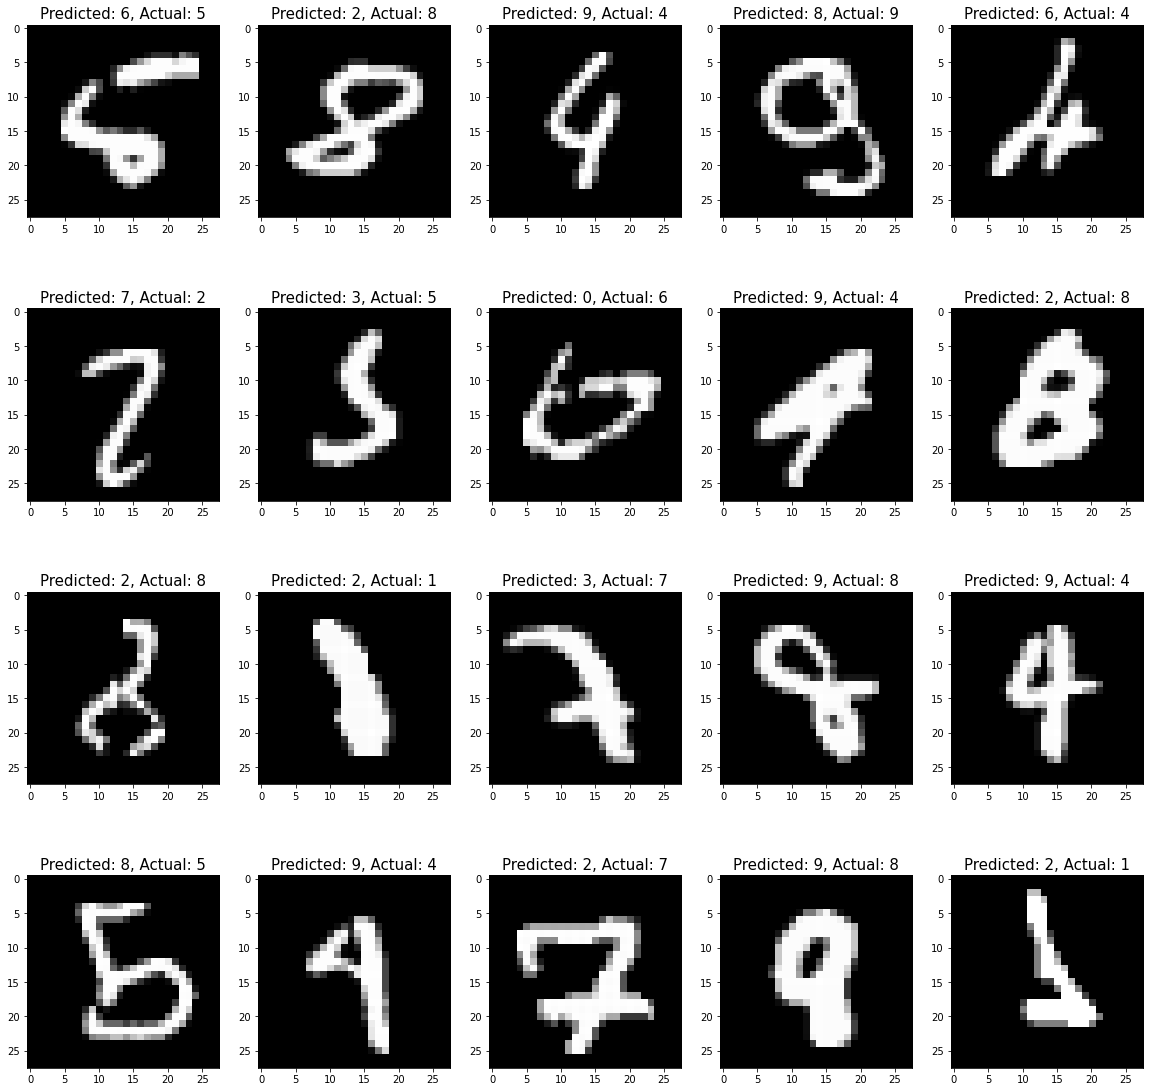

In [11]:
# Inspecting Misclassified Images

index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, preds):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index = index + 1

# Plot the test results

plt.figure(figsize=(20,20))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:20]):
    plt.subplot(4, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(preds[badIndex], y_test[badIndex]), fontsize = 15)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.98      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.99      0.95      0.97       974
           9       0.96      0.97      0.97      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



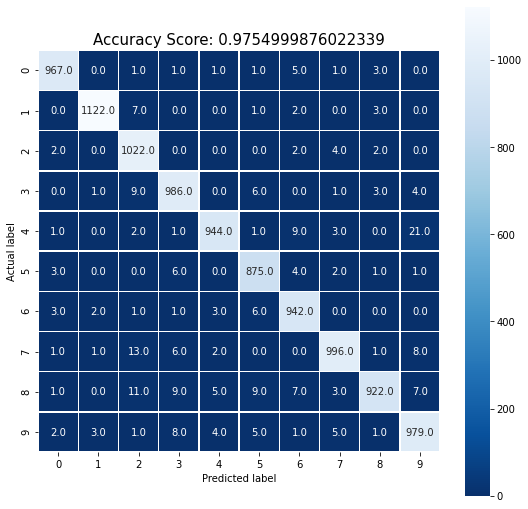

In [12]:
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import metrics

preds_bool = np.argmax(probs, axis=1)

cm = metrics.confusion_matrix(y_test, preds)

# Confusion Matrix Visualization

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

print(classification_report(y_test, preds_bool))

In [19]:
model2 = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model2.compile(optimizer="adamax", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model2.fit(x_train, y_train, batch_size = 60, epochs = 10, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 71us/sample - loss: 0.4514 - acc: 0.8812 - val_loss: 0.2694 - val_acc: 0.9270
Epoch 2/10
48000/48000 [==============================] - 3s 58us/sample - loss: 0.2501 - acc: 0.9301 - val_loss: 0.2186 - val_acc: 0.9392
Epoch 3/10
48000/48000 [==============================] - 3s 59us/sample - loss: 0.2022 - acc: 0.9425 - val_loss: 0.1829 - val_acc: 0.9508
Epoch 4/10
48000/48000 [==============================] - 3s 60us/sample - loss: 0.1718 - acc: 0.9508 - val_loss: 0.1622 - val_acc: 0.9548
Epoch 5/10
48000/48000 [==============================] - 3s 66us/sample - loss: 0.1492 - acc: 0.9581 - val_loss: 0.1517 - val_acc: 0.9581
Epoch 6/10
48000/48000 [==============================] - 3s 62us/sample - loss: 0.1318 - acc: 0.9625 - val_loss: 0.1427 - val_acc: 0.9588
Epoch 7/10
48000/48000 [==============================] - 3s 64us/sample - loss: 0.1180 - acc: 0.9673 - val_loss: 0.

In [20]:
loss, accuracy = model2.evaluate(x_test, y_test)
print(f"Accuracy = {accuracy*100:.2f} %")

10000/10000 [==============================] - 1s 63us/sample - loss: 0.1039 - acc: 0.9680
Accuracy = 96.80 %


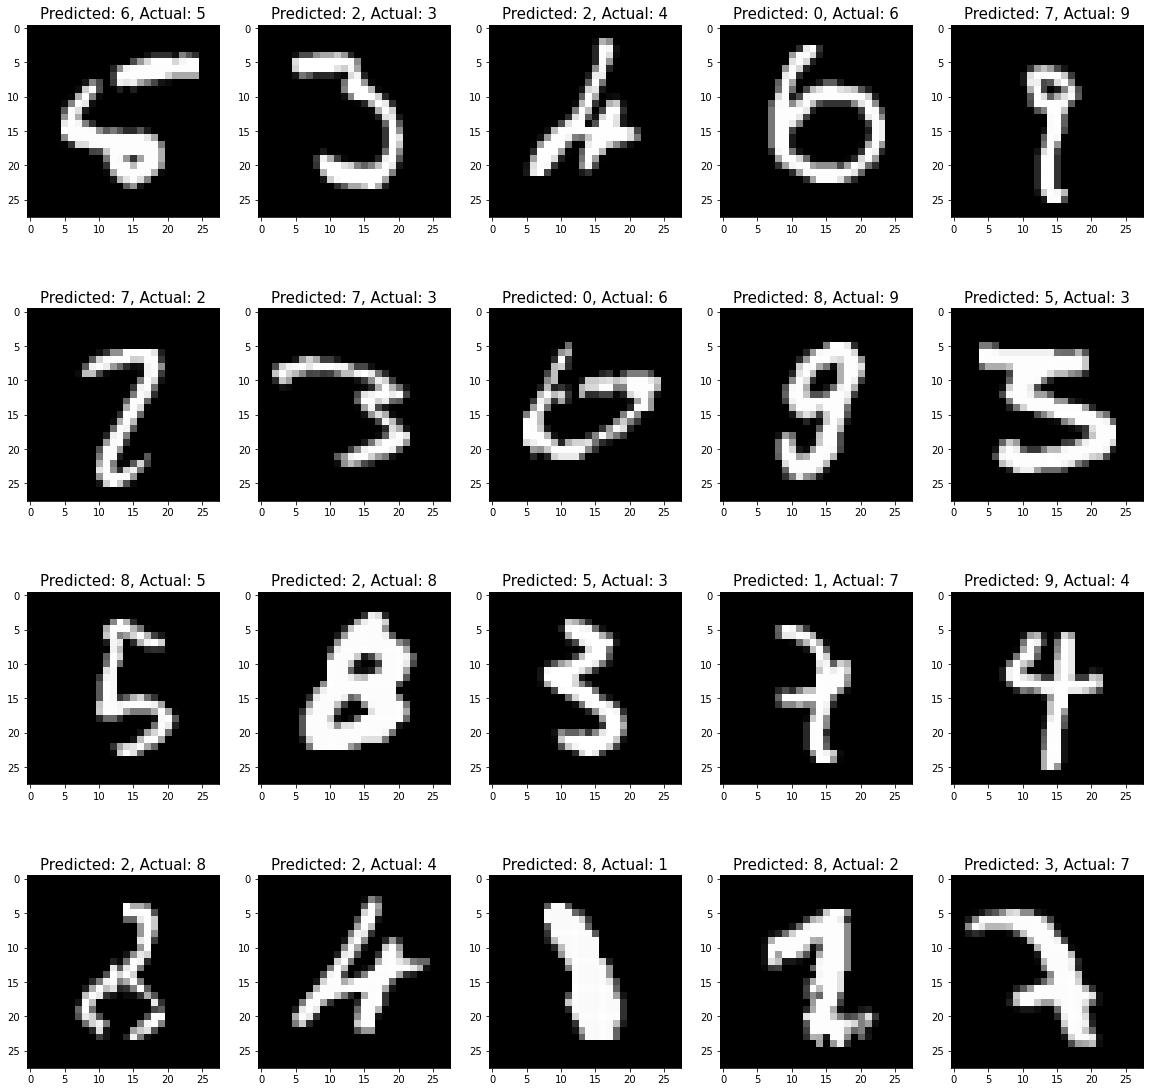

In [21]:
preds2 = model2.predict_classes(x_test)

# Inspecting Misclassified Images

import numpy as np 
import matplotlib.pyplot as plt

index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, preds2):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index = index + 1

# Plot the test results

plt.figure(figsize=(20,20))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:20]):
    plt.subplot(4, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(preds2[badIndex], y_test[badIndex]), fontsize = 15)

In [22]:
model3 = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])
model3.compile(optimizer="RMSprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model3.fit(x_train, y_train, batch_size = 60, epochs = 5, validation_split = 0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 75us/sample - loss: 0.3442 - acc: 0.9059 - val_loss: 0.1907 - val_acc: 0.9461
Epoch 2/5
48000/48000 [==============================] - 3s 67us/sample - loss: 0.1695 - acc: 0.9506 - val_loss: 0.1396 - val_acc: 0.9610
Epoch 3/5
48000/48000 [==============================] - 3s 64us/sample - loss: 0.1216 - acc: 0.9644 - val_loss: 0.1188 - val_acc: 0.9656
Epoch 4/5
48000/48000 [==============================] - 3s 70us/sample - loss: 0.0953 - acc: 0.9725 - val_loss: 0.1087 - val_acc: 0.9682
Epoch 5/5
48000/48000 [==============================] - 3s 62us/sample - loss: 0.0766 - acc: 0.9777 - val_loss: 0.1025 - val_acc: 0.9712


In [23]:
loss, accuracy = model3.evaluate(x_test, y_test)
print(f"Accuracy = {accuracy*100:.2f} %")

10000/10000 [==============================] - 0s 32us/sample - loss: 0.0971 - acc: 0.9714
Accuracy = 97.14 %


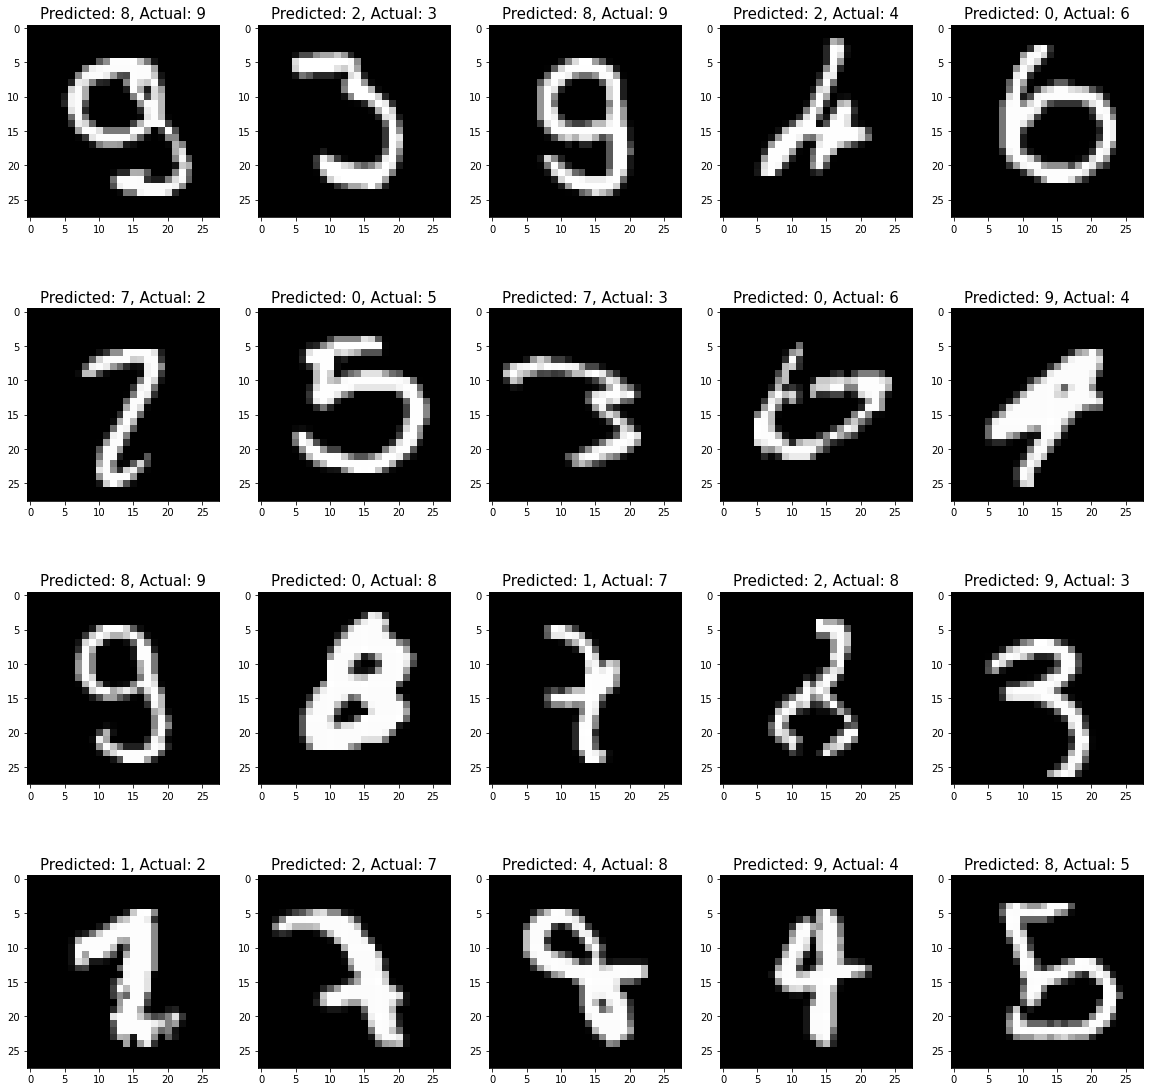

In [24]:
preds3 = model3.predict_classes(x_test)

# Inspecting Misclassified Images

import numpy as np 
import matplotlib.pyplot as plt

index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, preds3):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index = index + 1

# Plot the test results

plt.figure(figsize=(20,20))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:20]):
    plt.subplot(4, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(preds3[badIndex], y_test[badIndex]), fontsize = 15)